# Linear Regression

In [88]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Housing.csv")
df

In [ ]:
df.info()

### Importing Model

In [14]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.iloc[:,[1,2]]
x

In [ ]:
y = df.iloc[:,[0]]
y

#### creating regression's object

In [25]:
model = LinearRegression()

#### training

In [ ]:
model.fit(x,y)

#### prediction

In [ ]:
model.predict([[1000,3]])

#### intercept or c in y = mx+c (linear regression equation)

In [93]:
intercept = model.intercept_

slope or m

In [92]:
slope = model.coef_

R squared error

In [85]:
r2_error = model.score(x,y)

## Performing EDA

#### Label Encoding

In [35]:
# Import label encoder
from sklearn import preprocessing

In [36]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
processed_df = df
df.head()

### Label Encoding

In [54]:
processing_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

In [56]:
for col in processing_list:
  processed_df[col]= label_encoder.fit_transform(processed_df[col])

In [ ]:
processed_df

#### Splitting the data in training and testing

In [59]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_df.drop(columns=['price']), processed_df['price'],test_size=0.2,random_state=2)
X_train, X_test, y_train, y_test

#### model training and testing

In [ ]:
model.fit(X_train,y_train)

In [73]:
training_data_prediction = model.predict(X_train)

In [68]:
model.score(X_train,y_train)

0.6884454072877346

### Error Calculation

In [72]:
from sklearn import metrics

In [74]:
# R square error
error_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean absolute error
error_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print('R squared error : ', error_1)
print('Mean abs error : ', error_2)

R squared error :  0.6884454072877346
Mean abs error :  753162.9161507755


### Graph Visualization

In [75]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Actual vs Predicted price')

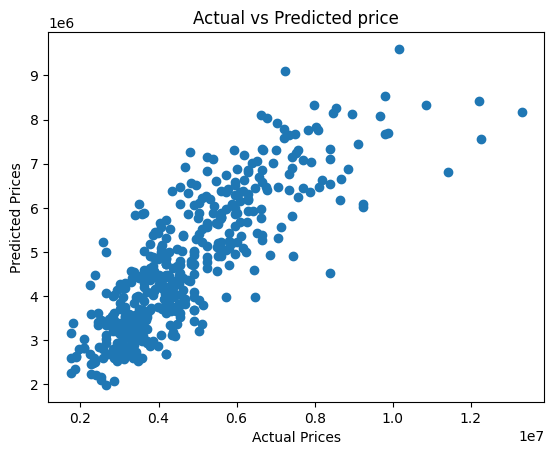

In [90]:
# plt.figure(figsize=(10,10))
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted price")
# plt.show

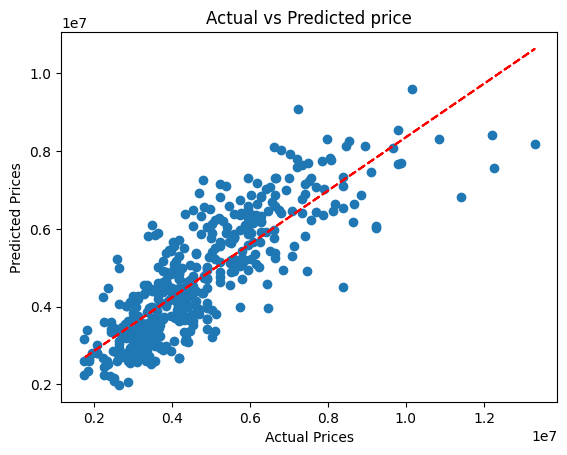

In [91]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted price")

# Fit the trend line
z = np.polyfit(y_train, training_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"r--")

# Show the plot
plt.show()